In [1]:
# dependencies
# !pip install pandas
# !pip install numpy
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud

In [2]:
# file upload function on google colab

# from google.colab import files
# uploaded = files.upload()

In [3]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string 
import re

class Preprocess:
    ''' 
    This class is used to preprocess the text using various techniques. It preprocesses the data sentence. 
    How to use
    >>> pre = Preprocess()
    >>> pre.preprocessing("Your sentence goes here")
    ['sentence', 'go']
    Will get the preprocessed sentence in form f a list
    '''
    
    def __init__(self):
        ''' 
        Initializer function. Intitializes various classes.
        '''
        
        # Initializing the wordnet Lemmatizer
        self.lemmatizer = WordNetLemmatizer()
        
        # Initializing the Tweet Tokenizer
        self.tweettoken=TweetTokenizer()
    
        # getting the list of all stop words from nltk
        self.stop_words = set(stopwords.words('english'))

        # now some of the words are removed from th stopword list, becuae these word specifically indicate a negative sentiment 
        self.stop_words.discard("not")
        self.stop_words.discard("didn't")
        self.stop_words.discard("doesn't")
        self.stop_words.discard("wasn't")
        self.stop_words.discard("shouldn't")
        self.stop_words.discard("needn't")
        self.stop_words.discard("hasn't")
        self.stop_words.discard("haven't")
        self.stop_words.discard("hadn't")
        self.stop_words.discard("don't")
        
        # some words that have to be removed ... unnecessary words
        self.remove_words=[".","..","..."]
        
    def sent_tokenize(self,data):
        '''
        Used to break the review into sentences. But we don't need to break the review into sentences
        '''
        
        # joining all the sentnces in the review by emoving '.' 
        data=data.replace("."," ")
        return data

    def word_tokenize(self,sent):
        '''
        Breaks the sentence into tokens. 
        Tweet Tokenizer has been specifically used for thsi task 
        since the reviews were a type of free text and contained emojis 
        and various other non-inmportant information which was non-relevant
        '''
        return self.tweettoken.tokenize(sent)
    
    def lemmatize(self,word):
        '''
        This function lemmatizes the word and brings it to a common word format.
        Also # was removed from the hastag words ... so that they can be processed further
        '''
        if("#" in word):
            word=word.replace("#","")
        return self.lemmatizer.lemmatize(word)
    
    def is_stop_word(self,word):
        '''
        Function used to check if a given word lies in our stopword list
        '''
        if(word.lower() in self.stop_words):
            return True
        return False
    
    def has_number(self,word):
        '''
        Used to check if a word has a number
        '''
        return any(char.isdigit() for char in word)
    
    def deEmojify(self, word):
        '''
        used to remove emoji from a word
        '''
        return word.encode('ascii', 'ignore').decode('ascii')

    def is_extra_word(self,word):
        '''
        Removes all extra words by calling various functions defined above
        like removing punctuation words, words having numbers, @ words, stop words
        or any special words which has been marked in remove_words list
        '''
        if(self.has_number(word.lower())):
            return True
        if('@' in word.lower()):
            return True
        if(self.is_stop_word(word.lower())):
            return True
        if(word.lower() in string.punctuation):
            return True
        if(word.lower() in self.remove_words):
            return True
        if(len(word)==0):
            return True
        return False
    
    def reduce_lengthening(self,word):
        '''
        Shortens the words, if the characters in a word repeats.
        It would be redcued to having at max of 2 repeating chars.
        For eg:- aweeeesome=> aweesome
        '''
        pattern = re.compile(r"(.)\1{2,}")
        return pattern.sub(r"\1\1", word)
        
    def preprocessing(self,data):
        '''
        This method uses all the above methods to preprocess a complete sentence.
        The argument given is the review which we want to process.
        '''
        
#         joining all the sentences in a review
        sents=self.sent_tokenize(data)
#         spliiting a sentence into words
        word_tokenized=self.word_tokenize(sents)
        
#         processing all the words and applying varios functions
        words=[]
        for j in word_tokenized:
            w=j.lower()
            w=self.deEmojify(w)
            w=self.reduce_lengthening(w)
            w=self.lemmatize(w)
            if(self.is_extra_word(w)==False):
                words.append(w)
        return words


[nltk_data] Downloading package stopwords to /home/sagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sagar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the data

In [4]:
import pandas as pd 
import numpy as np

# reading the train and test file into dataframe
train_data = pd.read_csv("./src/train.csv")
test_data = pd.read_csv("./src/test.csv")

# converting the dataframe columns ... converting them to UTF-8 ... then into to list 
train_version = train_data['App Version Code'].values.astype('U').tolist()
train_version_name = train_data['App Version Name'].values.astype('U').tolist()
train_text = train_data['Review Text'].values.astype('U').tolist()
train_title = train_data['Review Title'].values.astype('U').tolist()
train_rating = train_data['Star Rating'].values.astype('U').tolist()

# conveting the rating from str to int
for i in range(len(train_rating)):
    train_rating[i]=int(train_rating[i])

## Data in data frame

In [7]:
# this is how the data looks
train_data.head()

,id,App Version Code,App Version Name,Review Text,Review Title,Star Rating
0,b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,NaN,NaN,Very bad wallet balance not use.,NaN,1
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.0,2.30,Froud app i recharge 199 but not done also sen...,NaN,1
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.0,2.12,Waste to write comments also,Waste no use,2
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.0,2.21,Nice apo,NaN,5
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.0,2.28,Good nice app,NaN,5


## Review count for the corresponding ratings

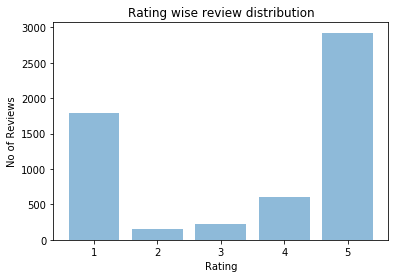

In [6]:
'''
Graph for => No. of reviews vs rating graph
i.e. the no. of reviews of all the ratings
'''

unique_ratings=list(set(train_rating))
unique_ratings.sort()
rating_count=[]
for i in unique_ratings:
    rating_count.append(train_rating.count(i))
import matplotlib.pyplot as plt
plt.bar(unique_ratings, rating_count, align='center', alpha=0.5)
plt.xlabel('Rating', )
plt.ylabel('No of Reviews', )
plt.title('Rating wise review distribution')
plt.show()


## Reviews count for the corresponding app version

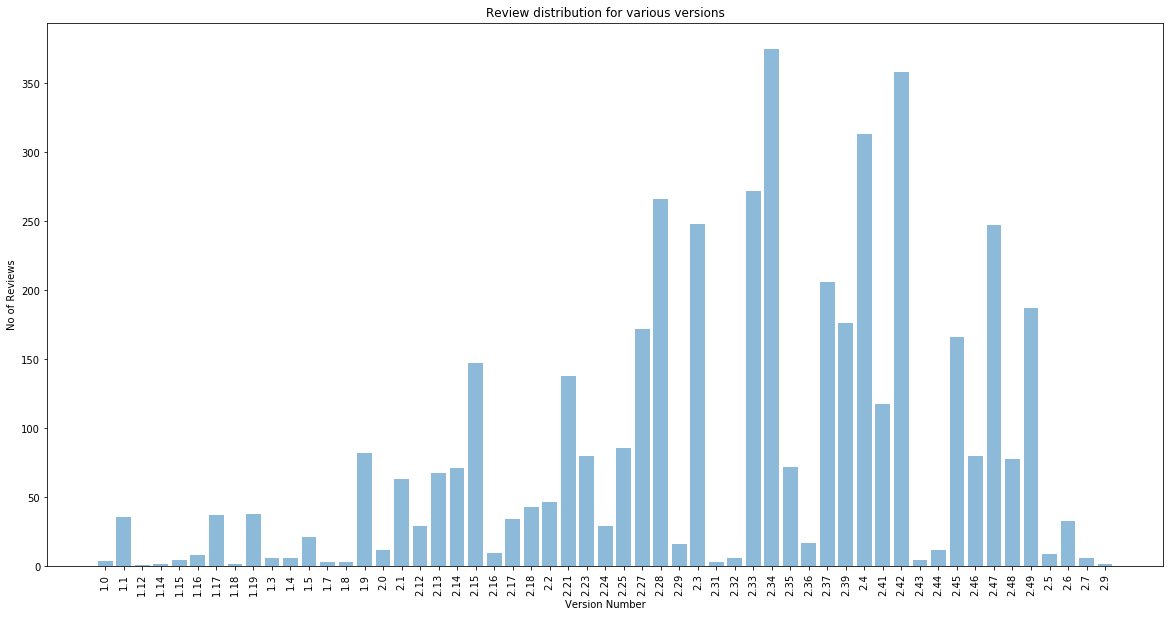

In [76]:
'''
Graph for => No. of reviews vs the version name
i.e. the no. of reviews of all the corresponding version
'''

# train_version_name.remove("nan")
ver_list=list(set(train_version_name))
ver_list.sort()
# ver_list=list(map(float))
rating_count=[]
for i in ver_list:
    rating_count.append(train_version_name.count(i))
# for i in zip(ver_list,rating_count):
#   print(i)
index=ver_list.index('nan')
ver_list.pop(index)
rating_count.pop(index)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(ver_list, rating_count, align='center', alpha=0.5)
plt.xlabel('Version Number')
plt.ylabel('No of Reviews')
plt.xticks(rotation='vertical')
plt.title('Review distribution for various versions')
plt.show()


## Reviews which have a title with them vs Rating 

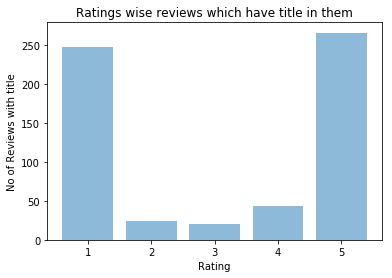

In [9]:
'''
 graph of => Numner of reviews with title vs Rating
 number of reviews which have title with the corresponding rating
'''
# getting all the unique ratings 
unique_ratings=list(set(train_rating))
unique_ratings.sort()

# getting the count of various ratings
title_rating_dist=[0,0,0,0,0]
for i,j in zip(train_title,train_rating):
    if(i!='nan'):
        title_rating_dist[j-1]+=1

# plotting the data
import matplotlib.pyplot as plt
plt.bar(unique_ratings, title_rating_dist, align='center', alpha=0.5)
plt.xlabel('Rating', )
plt.ylabel('No of Reviews with title', )
plt.title('Ratings wise reviews which have title in them')
plt.show()

## Minimum, Average and Maximum length of a review after preprocessing with the corresponding  Rating

In [11]:
def average(l):
    return sum(l)//len(l)

rating_review_data={1:[],2:[],3:[],4:[],5:[]}
rating_review_len={1:[],2:[],3:[],4:[],5:[]}

# preprocessing the data 
pre=Preprocess()
for i,j in zip(train_text,train_rating):
    q=pre.preprocessing(i)
    rating_review_data[j].append(q)
    rating_review_len[j].append(len(q))
    
# making a dataframe for the above information
df = pd.DataFrame(np.array([
    [min(rating_review_len[1]),average(rating_review_len[1]),max(rating_review_len[1])],
    [min(rating_review_len[2]),average(rating_review_len[2]),max(rating_review_len[2])],
    [min(rating_review_len[3]),average(rating_review_len[3]),max(rating_review_len[3])],
    [min(rating_review_len[4]),average(rating_review_len[4]),max(rating_review_len[4])],
    [min(rating_review_len[5]),average(rating_review_len[5]),max(rating_review_len[5])],]).transpose(),
    columns=['Rating=1', 'Rating=2', 'Rating=3', 'Rating=4', 'Rating=5'])

df.rename(index={0:'minimum length',1:'average length',2:'maximum length'}, inplace=True)
print("Word count of reviews of various lengths")
df.head()

Word count of reviews of various lengths


,Rating=1,Rating=2,Rating=3,Rating=4,Rating=5
minimum length,0,0,0,0,0
average length,13,12,9,5,4
maximum length,111,86,66,59,59


## Word Cloud of Reviews of Different Ratings

In [13]:
# separating the data into different ratings after pre processing them
rating_review_data={1:[],2:[],3:[],4:[],5:[]}
pre=Preprocess()
for i,j in zip(train_text,train_rating):
    rating_review_data[j].append(" ".join(pre.preprocessing(i)))

In WordCloud the words which are bigger, reffers to the words that have very high frequency. Thus they can help us see the common words used by the users, who gave that particular rating. 

### Rating = 1

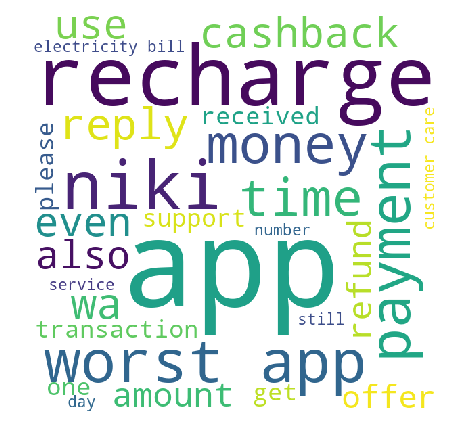

In [15]:
# rating=1
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import nltk

l=" ".join(rating_review_data[1])
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = set(nltk.corpus.stopwords.words('english')), 
                min_font_size = 20).generate(l.lower()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Rating = 2

rating=2


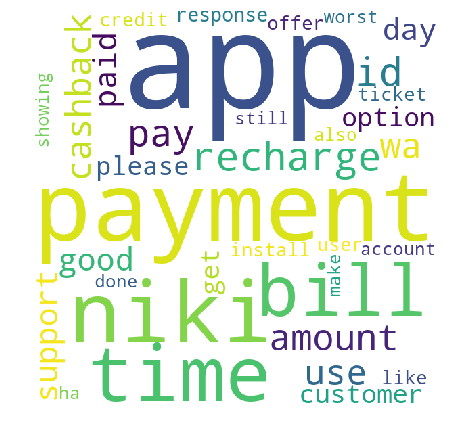

In [96]:
print("rating=2")
l=" ".join(rating_review_data[2])
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = set(nltk.corpus.stopwords.words('english')), 
                min_font_size = 20).generate(l.lower()) 
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Rating = 3

rating=3


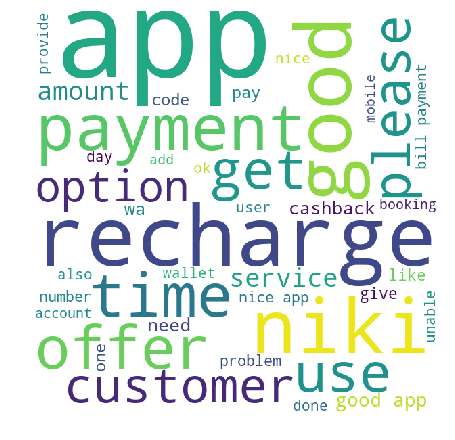

In [100]:
l=" ".join(rating_review_data[3])
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = set(nltk.corpus.stopwords.words('english')), 
                min_font_size = 20).generate(l.lower()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Rating = 4 

rating=4


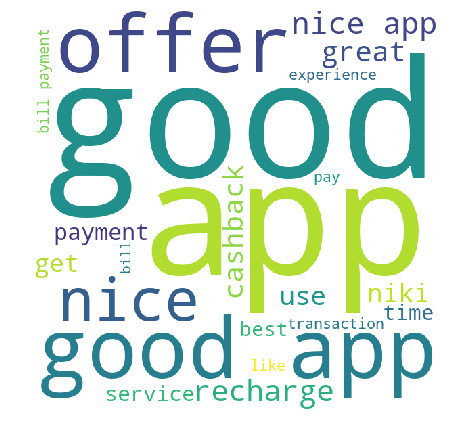

In [99]:
l=" ".join(rating_review_data[4])
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = set(nltk.corpus.stopwords.words('english')), 
                min_font_size = 20).generate(l.lower()) 
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Rating = 5

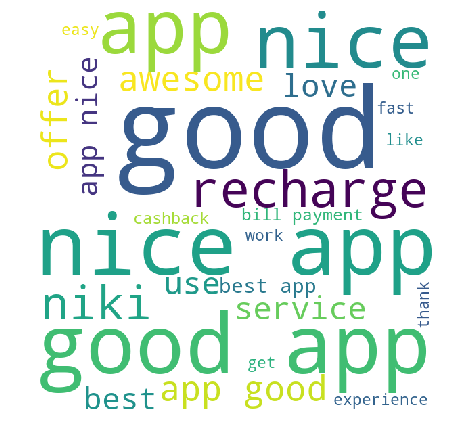

In [16]:
l=" ".join(rating_review_data[5])
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = set(nltk.corpus.stopwords.words('english')), 
                min_font_size = 20).generate(l.lower()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
